In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation
Create a Series by passing list of values with default integer

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Create a DataFrame by passing NumPy array, with a datetime index and labeled columns

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.016060,1.164073,-0.328314,0.309657
2013-01-02,1.629874,-1.730005,0.095680,-1.034145
2013-01-03,-2.458939,0.665381,0.758674,-2.392699
2013-01-04,0.169774,2.042630,0.820160,-0.413595
2013-01-05,1.778459,-1.260840,0.257498,1.254065
2013-01-06,0.911894,0.838113,-0.616153,-1.601621


In [5]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index= list(range(4)), dtype='float32'),
                    'D': np.array([3]*4, dtype='int32'),
                    'E': pd.Categorical(['test', 'train', 'test', 'train']),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing Data
Here is how to view the top and bottom rows of the frame:

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.016060,1.164073,-0.328314,0.309657
2013-01-02,1.629874,-1.730005,0.095680,-1.034145
2013-01-03,-2.458939,0.665381,0.758674,-2.392699
2013-01-04,0.169774,2.042630,0.820160,-0.413595
2013-01-05,1.778459,-1.260840,0.257498,1.254065


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,0.169774,2.042630,0.820160,-0.413595
2013-01-05,1.778459,-1.260840,0.257498,1.254065
2013-01-06,0.911894,0.838113,-0.616153,-1.601621


Display the index, columns and underlying NumPy data.

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 0.01606031,  1.1640731 , -0.3283139 ,  0.30965739],
       [ 1.62987447, -1.73000542,  0.0956796 , -1.0341455 ],
       [-2.45893894,  0.665381  ,  0.75867369, -2.39269877],
       [ 0.16977432,  2.04263016,  0.82016036, -0.41359503],
       [ 1.77845948, -1.26084011,  0.25749779,  1.25406524],
       [ 0.91189353,  0.83811337, -0.61615294, -1.6016206 ]])

describe() shows a quick statistical summary of the data.

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.341187,0.286559,0.164591,-0.646390
std,1.550998,1.467141,0.574213,1.318512
min,-2.458939,-1.730005,-0.616153,-2.392699
25%,0.054489,-0.779285,-0.222316,-1.459752
50%,0.540834,0.751747,0.176589,-0.723870
75%,1.450379,1.082583,0.633380,0.128844
max,1.778459,2.042630,0.820160,1.254065


Transposing your data:

In [13]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.016060,1.629874,-2.458939,0.169774,1.778459,0.911894
B,1.164073,-1.730005,0.665381,2.042630,-1.260840,0.838113
C,-0.328314,0.095680,0.758674,0.820160,0.257498,-0.616153
D,0.309657,-1.034145,-2.392699,-0.413595,1.254065,-1.601621


Sorting by an axis:

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.309657,-0.328314,1.164073,0.016060
2013-01-02,-1.034145,0.095680,-1.730005,1.629874
2013-01-03,-2.392699,0.758674,0.665381,-2.458939
2013-01-04,-0.413595,0.820160,2.042630,0.169774
2013-01-05,1.254065,0.257498,-1.260840,1.778459
2013-01-06,-1.601621,-0.616153,0.838113,0.911894


Sorting by values:

In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,1.629874,-1.730005,0.095680,-1.034145
2013-01-05,1.778459,-1.260840,0.257498,1.254065
2013-01-03,-2.458939,0.665381,0.758674,-2.392699
2013-01-06,0.911894,0.838113,-0.616153,-1.601621
2013-01-01,0.016060,1.164073,-0.328314,0.309657
2013-01-04,0.169774,2.042630,0.820160,-0.413595


# Selection

Use optimized pandas data access methods: .at, .iat, .loc and .iloc
## Getting

Selecting a single column, yeilding a Series equivalent of df.A

In [16]:
df['A']

2013-01-01    0.016060
2013-01-02    1.629874
2013-01-03   -2.458939
2013-01-04    0.169774
2013-01-05    1.778459
2013-01-06    0.911894
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [17]:
df[0:3]

,A,B,C,D
2013-01-01,0.016060,1.164073,-0.328314,0.309657
2013-01-02,1.629874,-1.730005,0.095680,-1.034145
2013-01-03,-2.458939,0.665381,0.758674,-2.392699


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.629874,-1.730005,0.095680,-1.034145
2013-01-03,-2.458939,0.665381,0.758674,-2.392699
2013-01-04,0.169774,2.042630,0.820160,-0.413595


Selection by Label
For getting a cross section using a label

In [19]:
df.loc[dates[0]]

A    0.016060
B    1.164073
C   -0.328314
D    0.309657
Name: 2013-01-01 00:00:00, dtype: float64

Selecing on a multi-axis by label:

In [20]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.016060,1.164073
2013-01-02,1.629874,-1.730005
2013-01-03,-2.458939,0.665381
2013-01-04,0.169774,2.042630
2013-01-05,1.778459,-1.260840
2013-01-06,0.911894,0.838113


Showing label slicing, both endpoints are _included_

In [21]:
df.loc['20130102': '20130105', ['A', 'B']]

,A,B
2013-01-02,1.629874,-1.730005
2013-01-03,-2.458939,0.665381
2013-01-04,0.169774,2.042630
2013-01-05,1.778459,-1.260840


Reduction in the dimensions of the returned object:

In [22]:
df.loc['20130102', ['A', 'B']]

A    1.629874
B   -1.730005
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [23]:
df.loc[dates[0], 'A']

0.016060311025490312

For getting fast access to a scalar (eqauivalent to prior method):

In [24]:
df.at[dates[0], 'A']

0.016060311025490312

Selection by Position

Select via the position of the passed integers:

In [25]:
df.iloc[3]

A    0.169774
B    2.042630
C    0.820160
D   -0.413595
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [26]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.169774,2.04263
2013-01-05,1.778459,-1.26084


By lists of integer position locations, similar to numpy/python style:

In [27]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,1.629874,0.095680
2013-01-03,-2.458939,0.758674
2013-01-05,1.778459,0.257498


For slicing rows explicitly:

In [28]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.629874,-1.730005,0.095680,-1.034145
2013-01-03,-2.458939,0.665381,0.758674,-2.392699


For slicing columns explicitly:

In [29]:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.164073,-0.328314
2013-01-02,-1.730005,0.095680
2013-01-03,0.665381,0.758674
2013-01-04,2.042630,0.820160
2013-01-05,-1.260840,0.257498
2013-01-06,0.838113,-0.616153


For getting a value explicitly:

In [30]:
df.iloc[1,1]

-1.7300054190346486

For getting fast access to a scalar (equivalent to the prior method):

In [31]:
df.iat[1,1]

-1.7300054190346486

# Boolean Indexing

Using a single column's values to select data

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.016060,1.164073,-0.328314,0.309657
2013-01-02,1.629874,-1.730005,0.095680,-1.034145
2013-01-04,0.169774,2.042630,0.820160,-0.413595
2013-01-05,1.778459,-1.260840,0.257498,1.254065
2013-01-06,0.911894,0.838113,-0.616153,-1.601621


Selecting values from a DataFrame where a boolean condition is met

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,0.016060,1.164073,NaN,0.309657
2013-01-02,1.629874,NaN,0.095680,NaN
2013-01-03,NaN,0.665381,0.758674,NaN
2013-01-04,0.169774,2.042630,0.820160,NaN
2013-01-05,1.778459,NaN,0.257498,1.254065
2013-01-06,0.911894,0.838113,NaN,NaN


Using the isin() method for flitering

In [34]:
df2 = df.copy()

df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

df2

,A,B,C,D,E
2013-01-01,0.016060,1.164073,-0.328314,0.309657,one
2013-01-02,1.629874,-1.730005,0.095680,-1.034145,one
2013-01-03,-2.458939,0.665381,0.758674,-2.392699,two
2013-01-04,0.169774,2.042630,0.820160,-0.413595,three
2013-01-05,1.778459,-1.260840,0.257498,1.254065,four
2013-01-06,0.911894,0.838113,-0.616153,-1.601621,three


In [35]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-2.458939,0.665381,0.758674,-2.392699,two
2013-01-05,1.778459,-1.260840,0.257498,1.254065,four


# Setting
Setting a new column automatically aligns the data by the indexes

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [37]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.016060,1.164073,-0.328314,0.309657,NaN
2013-01-02,1.629874,-1.730005,0.095680,-1.034145,1.0
2013-01-03,-2.458939,0.665381,0.758674,-2.392699,2.0
2013-01-04,0.169774,2.042630,0.820160,-0.413595,3.0
2013-01-05,1.778459,-1.260840,0.257498,1.254065,4.0
2013-01-06,0.911894,0.838113,-0.616153,-1.601621,5.0


Setting values by label:

In [38]:
df.at[dates[0], 'A'] = 0

df

,A,B,C,D,F
2013-01-01,0.000000,1.164073,-0.328314,0.309657,NaN
2013-01-02,1.629874,-1.730005,0.095680,-1.034145,1.0
2013-01-03,-2.458939,0.665381,0.758674,-2.392699,2.0
2013-01-04,0.169774,2.042630,0.820160,-0.413595,3.0
2013-01-05,1.778459,-1.260840,0.257498,1.254065,4.0
2013-01-06,0.911894,0.838113,-0.616153,-1.601621,5.0


Setting values by position:

In [39]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [40]:
df.loc[:,'D'] = np.array(([5]) * len(df))

In [41]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.328314,5,NaN
2013-01-02,1.629874,-1.730005,0.095680,5,1.0
2013-01-03,-2.458939,0.665381,0.758674,5,2.0
2013-01-04,0.169774,2.042630,0.820160,5,3.0
2013-01-05,1.778459,-1.260840,0.257498,5,4.0
2013-01-06,0.911894,0.838113,-0.616153,5,5.0


A _where_ operation with setting:

In [42]:
df2 = df.copy()

df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.328314,-5,NaN
2013-01-02,-1.629874,-1.730005,-0.095680,-5,-1.0
2013-01-03,-2.458939,-0.665381,-0.758674,-5,-2.0
2013-01-04,-0.169774,-2.042630,-0.820160,-5,-3.0
2013-01-05,-1.778459,-1.260840,-0.257498,-5,-4.0
2013-01-06,-0.911894,-0.838113,-0.616153,-5,-5.0


# Missing Data

Re-indexing allows you to change/add/elete the index on a specified axis. This returns a copy of the data

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.328314,5,NaN,NaN
2013-01-02,1.629874,-1.730005,0.095680,5,1.0,NaN
2013-01-03,-2.458939,0.665381,0.758674,5,2.0,NaN
2013-01-04,0.169774,2.042630,0.820160,5,3.0,NaN


In [44]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.328314,5,NaN,1.0
2013-01-02,1.629874,-1.730005,0.095680,5,1.0,1.0
2013-01-03,-2.458939,0.665381,0.758674,5,2.0,NaN
2013-01-04,0.169774,2.042630,0.820160,5,3.0,NaN


To drop any rows that have missing data.

In [45]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.629874,-1.730005,0.09568,5,1.0,1.0


Fill missing data:

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.328314,5,5.0,1.0
2013-01-02,1.629874,-1.730005,0.095680,5,1.0,1.0
2013-01-03,-2.458939,0.665381,0.758674,5,2.0,5.0
2013-01-04,0.169774,2.042630,0.820160,5,3.0,5.0


To get the boolean mask where values are _nan_

In [47]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations
## Stats
Operations in general _exclude_ missing data.  
  
Performing a descriptive statistic.

In [48]:
df.mean()

A    0.338510
B    0.092546
C    0.164591
D    5.000000
F    3.000000
dtype: float64

Same operation on another axis

In [49]:
df.mean(1)

2013-01-01    1.167922
2013-01-02    1.199110
2013-01-03    1.193023
2013-01-04    2.206513
2013-01-05    1.955023
2013-01-06    2.226771
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically boradcasts along the specified dimension.

In [50]:
s = pd.Series([1,3,5,np.nan, 6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-3.458939,-0.334619,-0.241326,4.0,1.0
2013-01-04,-2.830226,-0.957370,-2.179840,2.0,0.0
2013-01-05,-3.221541,-6.260840,-4.742502,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


# Apply
Applying functions to the data

In [52]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.328314,5,NaN
2013-01-02,1.629874,-1.730005,0.095680,5,1.0
2013-01-03,-2.458939,0.665381,0.758674,5,2.0
2013-01-04,0.169774,2.042630,0.820160,5,3.0
2013-01-05,1.778459,-1.260840,0.257498,5,4.0
2013-01-06,0.911894,0.838113,-0.616153,5,5.0


In [53]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.328314,5,NaN
2013-01-02,1.629874,-1.730005,-0.232634,10,1.0
2013-01-03,-0.829064,-1.064624,0.526039,15,3.0
2013-01-04,-0.659290,0.978006,1.346200,20,6.0
2013-01-05,1.119169,-0.282834,1.603698,25,10.0
2013-01-06,2.031063,0.555279,0.987545,30,15.0


In [54]:
df.apply(lambda x: x.max() - x.min())

A    4.237398
B    3.772636
C    1.436313
D    0.000000
F    4.000000
dtype: float64

# Histogramming

In [55]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    3
2    5
3    4
4    3
5    4
6    2
7    4
8    1
9    2
dtype: int32

In [56]:
s.value_counts()

4    3
5    2
3    2
2    2
1    1
dtype: int64

# String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operae on each element of the array, as in the code snippet below. Not that the pattern-matching in str generally uses regular expressions by default.

In [57]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
## Concat
pandas provides various facilities for easily combining together Series, DataFrame and Panel objects with various set logic for the indexes and relational algebra functionality in the case of join / merge-type operations

Concatenating pandas objects together with concat():

In [58]:
df = pd.DataFrame(np.random.randn(10,4))

df

,0,1,2,3
0,-0.663246,-0.332036,-1.095604,-0.142812
1,0.312015,0.045040,0.034939,0.538975
2,-0.594270,0.400783,-0.423093,0.488188
3,0.189603,-0.017875,-1.187451,0.827464
4,0.131702,1.036652,1.294945,-0.472687
5,-0.317883,0.336852,0.958643,-1.552852
6,1.777202,1.419976,-0.111756,0.760590
7,0.995439,1.014435,-0.413143,-0.345396
8,-0.525662,0.858151,-1.314335,-0.152080
9,0.688460,0.437497,0.339439,0.648650


In [59]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.663246 -0.332036 -1.095604 -0.142812
 1  0.312015  0.045040  0.034939  0.538975
 2 -0.594270  0.400783 -0.423093  0.488188,
           0         1         2         3
 3  0.189603 -0.017875 -1.187451  0.827464
 4  0.131702  1.036652  1.294945 -0.472687
 5 -0.317883  0.336852  0.958643 -1.552852
 6  1.777202  1.419976 -0.111756  0.760590,
           0         1         2         3
 7  0.995439  1.014435 -0.413143 -0.345396
 8 -0.525662  0.858151 -1.314335 -0.152080
 9  0.688460  0.437497  0.339439  0.648650]

In [60]:
pd.concat(pieces)

,0,1,2,3
0,-0.663246,-0.332036,-1.095604,-0.142812
1,0.312015,0.045040,0.034939,0.538975
2,-0.594270,0.400783,-0.423093,0.488188
3,0.189603,-0.017875,-1.187451,0.827464
4,0.131702,1.036652,1.294945,-0.472687
5,-0.317883,0.336852,0.958643,-1.552852
6,1.777202,1.419976,-0.111756,0.760590
7,0.995439,1.014435,-0.413143,-0.345396
8,-0.525662,0.858151,-1.314335,-0.152080
9,0.688460,0.437497,0.339439,0.648650


## Join
SQL syle merges

In [61]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example can be given as

In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [65]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append
Appends rows to a dataframe.

In [67]:
df = pd.DataFrame(np.random.randn(8, 4), columns=list('ABCD'))
df

,A,B,C,D
0,-0.493046,-1.929769,-0.509749,-1.087925
1,0.046011,0.548101,0.328145,1.816828
2,1.035626,0.387886,0.194542,-0.182481
3,2.230360,-0.143009,0.217990,1.206309
4,-0.080462,0.296792,0.180877,0.210569
5,-0.125391,-0.218031,0.131682,0.091264
6,0.874580,1.465831,1.427410,0.192609
7,-1.747945,-0.317806,-0.620446,-0.355783


In [68]:
df

,A,B,C,D
0,-0.493046,-1.929769,-0.509749,-1.087925
1,0.046011,0.548101,0.328145,1.816828
2,1.035626,0.387886,0.194542,-0.182481
3,2.230360,-0.143009,0.217990,1.206309
4,-0.080462,0.296792,0.180877,0.210569
5,-0.125391,-0.218031,0.131682,0.091264
6,0.874580,1.465831,1.427410,0.192609
7,-1.747945,-0.317806,-0.620446,-0.355783


In [69]:
s = df.iloc[3]
s

A    2.230360
B   -0.143009
C    0.217990
D    1.206309
Name: 3, dtype: float64

In [70]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.493046,-1.929769,-0.509749,-1.087925
1,0.046011,0.548101,0.328145,1.816828
2,1.035626,0.387886,0.194542,-0.182481
3,2.230360,-0.143009,0.217990,1.206309
4,-0.080462,0.296792,0.180877,0.210569
5,-0.125391,-0.218031,0.131682,0.091264
6,0.874580,1.465831,1.427410,0.192609
7,-1.747945,-0.317806,-0.620446,-0.355783
8,2.230360,-0.143009,0.217990,1.206309


# Grouping
By "group by" we are refering to a process involving one or more of following steps:
* **Splitting** the data into gropus based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

In [71]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                    'foo', 'bar', 'foo', 'foo'],
              'B': ['one', 'one', 'two', 'three',
                    'two', 'two', 'one', 'three'],
              'C': np.random.randn(8),
              'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.650447,-2.207658
1,bar,one,-0.008808,-0.153895
2,foo,two,-1.808817,1.475358
3,bar,three,1.878052,-0.471448
4,foo,two,0.903591,-0.312657
5,bar,two,-1.003513,-0.060657
6,foo,one,-2.095931,0.600607
7,foo,three,0.833427,-0.401106


Grouping and then applying the sum() function to the resulting groups

In [72]:
df.groupby('A').sum()

,C,D
A,,
bar,0.865731,-0.686000
foo,-0.517283,-0.845456


Grouping by multiple columns forms a heirarchical index, and again we can apply the sum function

In [73]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.008808 -0.153895
    three  1.878052 -0.471448
    two   -1.003513 -0.060657
foo one   -0.445483 -1.607051
    three  0.833427 -0.401106
    two   -0.905226  1.162701

Return a copy of DataFrame excluding elements from groups that do not staisfy boolean criteria specified by func

In [112]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
              'B': [1, 2, 3, 4, 5, 6],
              'C': [2.0, 5., 8., 1., 2., 9.]})
df

,A,B,C
0,foo,1,2.0
1,bar,2,5.0
2,foo,3,8.0
3,bar,4,1.0
4,foo,5,2.0
5,bar,6,9.0


In [114]:
grouped = df.groupby('A')
grouped.filter(lambda x: x['B'].mean() > 3.)

,A,B,C
1,bar,2,5.0
3,bar,4,1.0
5,bar,6,9.0


# Reshaping
## Stack

In [74]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 
            'foo', 'foo', 'qux', 'qux'],
           ['one','two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [75]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [76]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.235272  2.355797
      two     0.338042 -0.132886
baz   one    -0.976782 -0.357650
      two     1.290798 -0.762492
foo   one     0.273945  1.549777
      two    -0.279846  0.739005
qux   one    -1.362241 -0.431109
      two    -0.064434 -0.820117

In [77]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.235272  2.355797
      two     0.338042 -0.132886
baz   one    -0.976782 -0.357650
      two     1.290798 -0.762492

The stack() method 'compresses' a level in the DataFrames' columns

In [78]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.235272
               B    2.355797
       two     A    0.338042
               B   -0.132886
baz    one     A   -0.976782
               B   -0.357650
       two     A    1.290798
               B   -0.762492
dtype: float64

With a 'stacked' DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level.

In [79]:
stacked.unstack()

A         B
first second                    
bar   one    -0.235272  2.355797
      two     0.338042 -0.132886
baz   one    -0.976782 -0.357650
      two     1.290798 -0.762492

In [80]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.235272  0.338042
      B  2.355797 -0.132886
baz   A -0.976782  1.290798
      B -0.357650 -0.762492

In [81]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.235272 -0.976782
       B  2.355797 -0.357650
two    A  0.338042  1.290798
       B -0.132886 -0.762492

## Pivot Tables

In [82]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
              'B': ['A', 'B', 'C'] * 4,
              'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
              'D': np.random.randn(12),
              'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.379091,0.083504
1,one,B,foo,0.990927,0.312636
2,two,C,foo,-0.546904,0.447138
3,three,A,bar,0.578812,-0.991291
4,one,B,bar,-1.340753,0.001060
5,one,C,bar,0.785893,-0.773077
6,two,A,foo,-2.508299,1.170237
7,three,B,foo,0.259810,-0.950836
8,one,C,foo,-0.309932,-1.061019
9,one,A,bar,0.055315,0.241464


We can product pivot tables from this data very easily

In [83]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.055315  0.379091
      B -1.340753  0.990927
      C  0.785893 -0.309932
three A  0.578812       NaN
      B       NaN  0.259810
      C  1.293254       NaN
two   A       NaN -2.508299
      B  0.311139       NaN
      C       NaN -0.546904

## Time Series
pandas has simple, powerful and efficient functionality for performing resampling operations and during frequency conversion (e.g. converting second data into 5-minute data).

In [84]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [85]:
ts.resample('5Min').sum()

2012-01-01    23507
Freq: 5T, dtype: int32

In [86]:
ts.resample('5min').mean()

2012-01-01    235.07
Freq: 5T, dtype: float64

In [87]:
ts.resample('5min').ohlc()

,open,high,low,close
2012-01-01,217,498,1,85


In [88]:
ts.resample('5min').max()

2012-01-01    498
Freq: 5T, dtype: int32

In [89]:
ts.max()

498

For downsampling _closed_ can be set to 'left' or 'right' to specify which end of the interval is closed

In [90]:
ts.resample('5Min', closed='right').mean()

2011-12-31 23:55:00    217.000000
2012-01-01 00:00:00    235.252525
Freq: 5T, dtype: float64

In [91]:
ts[:59].mean()

212.45762711864407

<b>Note</b> - don't forget to check out https://elitedatascience.com/imbalanced-classes - for use cases of upsampling / downsampling / random forest algo

Time zone representation

In [92]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [93]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.326767
2012-03-07   -0.622441
2012-03-08   -1.332608
2012-03-09    0.804298
2012-03-10    0.058507
Freq: D, dtype: float64

In [94]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    1.326767
2012-03-07 00:00:00+00:00   -0.622441
2012-03-08 00:00:00+00:00   -1.332608
2012-03-09 00:00:00+00:00    0.804298
2012-03-10 00:00:00+00:00    0.058507
Freq: D, dtype: float64

Converting to another timezone

In [95]:
ts_utc.tz_convert('Asia/Calcutta')

2012-03-06 05:30:00+05:30    1.326767
2012-03-07 05:30:00+05:30   -0.622441
2012-03-08 05:30:00+05:30   -1.332608
2012-03-09 05:30:00+05:30    0.804298
2012-03-10 05:30:00+05:30    0.058507
Freq: D, dtype: float64

Converting between timespan representations:

In [96]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [97]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.274067
2012-02-29   -0.811241
2012-03-31   -0.033143
2012-04-30    1.194062
2012-05-31   -0.633113
Freq: M, dtype: float64

In [98]:
ps = ts.to_period()
ps

2012-01    0.274067
2012-02   -0.811241
2012-03   -0.033143
2012-04    1.194062
2012-05   -0.633113
Freq: M, dtype: float64

In [99]:
ps.to_timestamp()

2012-01-01    0.274067
2012-02-01   -0.811241
2012-03-01   -0.033143
2012-04-01    1.194062
2012-05-01   -0.633113
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [100]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [101]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts[:5]

1990Q1    0.401787
1990Q2    0.398497
1990Q3    0.329889
1990Q4   -1.025884
1991Q1    0.351712
Freq: Q-NOV, dtype: float64

In [102]:
ts.index = (prng.asfreq('M', 'e')+1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.401787
1990-06-01 09:00    0.398497
1990-09-01 09:00    0.329889
1990-12-01 09:00   -1.025884
1991-03-01 09:00    0.351712
Freq: H, dtype: float64

## Categoricals
pandas can include categorical data in a DataFrame

In [103]:
df = pd.DataFrame({'id': [1,2,3,4,5,6], 'raw_grade' : list('abbaae')})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type

In [104]:
df['grade'] = df.raw_grade.astype('category')
df.grade

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to meaningful names (assigning to Series.cat.categories is inplace!)

In [105]:
df.grade.cat.categories = ['Very Good', 'Good', 'Very Bad']
df.grade

0    Very Good
1         Good
2         Good
3    Very Good
4    Very Good
5     Very Bad
Name: grade, dtype: category
Categories (3, object): [Very Good, Good, Very Bad]

Reorder the categories and simultaneously add the missing categories (methods under Series.cat return a new Series by default)

In [106]:
df.grade = df.grade.cat.set_categories(['Very Bad', 'Bad', 'Medium', 'Good', 'Very Good' ])
df.grade

0    Very Good
1         Good
2         Good
3    Very Good
4    Very Good
5     Very Bad
Name: grade, dtype: category
Categories (5, object): [Very Bad, Bad, Medium, Good, Very Good]

Sorting is per order in the categories, not lexical order

In [107]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,Very Bad
1,2,b,Good
2,3,b,Good
0,1,a,Very Good
3,4,a,Very Good
4,5,a,Very Good


Grouping by categorical column also shows empty categories

In [108]:
df.groupby('grade').size()

grade
Very Bad     1
Bad          0
Medium       0
Good         2
Very Good    3
dtype: int64

# Plotting

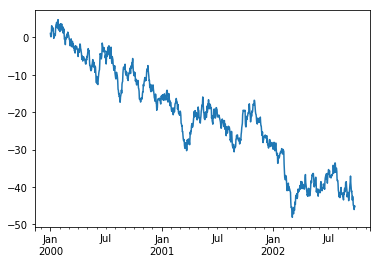

In [109]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()  # Generates random plot!!

ts.plot()

On a DataFrame, the plot() method is a convenience to plot all the column with labels

<Figure size 432x288 with 0 Axes>

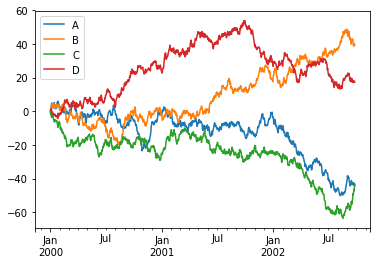

In [110]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
             columns=list('ABCD'))
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')